# 7.2 Getting Data from Yahoo Financial


- [**Retrieve Stock Data**](#Retrieve-Stock-Data)
  - [Set Start and End dates for Stocks to Retrieve](#Set-Start-and-End-dates-for-Stocks-to-Retrieve)  
  - [Retrieving Multiple Series at the same Time](#Retrieving-Multiple-Series-at-the-same-Time)  
  - [Extract Closing Prices from Retrieved Stock Data](#Extract-Closing-Prices-from-Retrieved-Stock-Data)  
  

  
- [**Plot Data**](#Plot-Data)  
  - [Plot with pandas plot](#Plot-with-pandas-plot())  
  - [Plot with cufflinks](#Plot-with-cufflinks)   
    
    
- [**Select Stocks to Plot**](#Select-Stocks-to-Plot)  


- [**More Chart Types**](#More-Chart-Types)  
  - [Spread Chart](#Spread-Chart)   
  - [Bestfit Line Chart](#Bestfit-Line-Chart)  
  - [Filled Line Chart](#Filled-Line-Chart)  
  - [Area Chart](#Area-Chart)  
    
    


In [77]:
import matplotlib.pyplot as plt
import pandas as pd

import pandas_datareader.data as web
import datetime as dt

In [78]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)

# Retrieve Stock Data

### Set Start and End dates for Stocks to Retrieve

In [79]:
# Start for Stock series:  Jan 1, 2010
start = dt.datetime(2010, 1, 1)

# End of Stock series:  Dec 31, 2018
end = dt.datetime(2018, 12, 31)

### Retrieving Stock Data

In [80]:
stocks_to_retrieve = ['IBM', 'AAPL', 'NFLX', 'ORCL']
df = web.DataReader(stocks_to_retrieve, 'yahoo', start, end)
df.head()

Attributes       High                                         Low              \
Symbols          AAPL         IBM      NFLX       ORCL       AAPL         IBM   
Date                                                                            
2010-01-04  30.642857  132.970001  7.961429  25.190001  30.340000  130.850006   
2010-01-05  30.798571  131.850006  7.657143  24.850000  30.464285  130.100006   
2010-01-06  30.747143  131.490005  7.672857  24.920000  30.107143  129.809998   
2010-01-07  30.285715  130.250000  7.757143  24.610001  29.864286  128.910004   
2010-01-08  30.285715  130.919998  7.742857  24.750000  29.865715  129.050003   

Attributes                            Open              ...     Close  \
Symbols         NFLX       ORCL       AAPL         IBM  ...      NFLX   
Date                                                    ...             
2010-01-04  7.565714  24.660000  30.490000  131.179993  ...  7.640000   
2010-01-05  7.258572  24.350000  30.657143  131.679993  ...  7.358572   
2010-01-06  7.197143  24.379999  30.625713  130.679993  ...  7.617143   
2010-01-07  7.462857  24.080000  30.250000  129.869995  ...  7.485714   
2010-01-08  7.465714  24.250000  30.042856  129.070007  ...  7.614286   

Attributes                  Volume                                     \
Symbols          ORCL         AAPL        IBM        NFLX        ORCL   
Date                                                                    
2010-01-04  24.850000  123432400.0  6155300.0  17239600.0  26795000.0   
2010-01-05  24.820000  150476200.0  6841400.0  23753100.0  28669900.0   
2010-01-06  24.459999  138040000.0  5605300.0  23290400.0  24560700.0   
2010-01-07  24.379999  119282800.0  5840600.0   9955400.0  30469700.0   
2010-01-08  24.680000  111902700.0  4197200.0   8180900.0  23542400.0   

Attributes  Adj Close                                   
Symbols          AAPL         IBM      NFLX       ORCL  
Date                                                    
2010-01-04  20.386072  100.478867  7.640000  22.082300  
2010-01-05  20.421322   99.265091  7.358572  22.055643  
2010-01-06  20.096491   98.620255  7.617143  21.735739  
2010-01-07  20.059338   98.278870  7.485714  21.664650  
2010-01-08  20.192701   99.265091  7.614286  21.931238  

[5 rows x 24 columns]

In [81]:
df.columns

MultiIndex(levels=[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], ['AAPL', 'IBM', 'NFLX', 'ORCL']],
           codes=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]],
           names=['Attributes', 'Symbols'])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2010-01-04 to 2018-12-31
Data columns (total 24 columns):
(High, AAPL)         2264 non-null float64
(High, IBM)          2264 non-null float64
(High, NFLX)         2264 non-null float64
(High, ORCL)         2264 non-null float64
(Low, AAPL)          2264 non-null float64
(Low, IBM)           2264 non-null float64
(Low, NFLX)          2264 non-null float64
(Low, ORCL)          2264 non-null float64
(Open, AAPL)         2264 non-null float64
(Open, IBM)          2264 non-null float64
(Open, NFLX)         2264 non-null float64
(Open, ORCL)         2264 non-null float64
(Close, AAPL)        2264 non-null float64
(Close, IBM)         2264 non-null float64
(Close, NFLX)        2264 non-null float64
(Close, ORCL)        2264 non-null float64
(Volume, AAPL)       2264 non-null float64
(Volume, IBM)        2264 non-null float64
(Volume, NFLX)       2264 non-null float64
(Volume, ORCL)       2264 non-null float64
(Adj Close, AAP

## Extract *Closing* Prices from Retrieved Stock Data  
- Other options:  
  - Low  
  - High  
  - Open
  - Volume  
  - Adj Close

In [83]:
df_closing = df['Close']
#df_closing.reindex
df_closing.head()

Symbols,AAPL,IBM,NFLX,ORCL
Date,,,,
2010-01-04,30.572857,132.449997,7.640000,24.850000
2010-01-05,30.625713,130.850006,7.358572,24.820000
2010-01-06,30.138571,130.000000,7.617143,24.459999
2010-01-07,30.082857,129.550003,7.485714,24.379999
2010-01-08,30.282858,130.850006,7.614286,24.680000


In [84]:
df_closing.columns

Index(['AAPL', 'IBM', 'NFLX', 'ORCL'], dtype='object', name='Symbols')

# Plot Data

### plot with pandas plot()

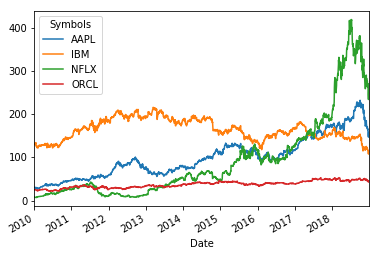

In [85]:
df_closing.plot()

### Plot with cufflinks

In [86]:
df_closing.iplot(kind='line',
                 title='Apple, IBM, Netflix and Oracle:  2010-2018')

# Select Stocks to Plot  
### If you don't want to plot every column in the dataframe

In [87]:
df_closing.columns

Index(['AAPL', 'IBM', 'NFLX', 'ORCL'], dtype='object', name='Symbols')

In [88]:
stocks_to_plot = ['IBM', 'AAPL', 'NFLX']

df_closing[stocks_to_plot].iplot(kind='line',
                 theme='space',
                 title='IBM, Apple and Netflix:  2010-2018')

# More Chart Types 

### Spread Chart

In [89]:
stocks_to_plot = ['IBM', 'AAPL']

df_closing[stocks_to_plot].iplot(kind='spread',
                 theme='space',
                 title='Spread Chart: IBM and Apple (2010-2018)')

### Bestfit Line Chart

In [90]:
stocks_to_plot = ['AAPL', 'NFLX']

df_closing[stocks_to_plot].iplot(kind='line',
                                 xTitle='Dates',
                                 yTitle='Stock Price',
                                 theme='white',
                                 bestfit=True,
                                 title='Apple and Netflix:  2010-2018',
                                 colors=['green', 'blue'],
                                 bestfit_colors=['green', 'blue'],
                                 colorscale='-blues',
                                )

### Filled Line Chart

In [91]:
stocks_to_plot = ['AAPL', 'NFLX']

df_closing[stocks_to_plot].iplot(kind='line',
                                 fill=True,
                                 xTitle='Dates',
                                 yTitle='Stock Price',
                                 theme='space',
                                 title='Apple and Netflix:  2010-2018',
                                 colorscale='-blues',
                                 )

### Area Chart  
- Notes:  
  - This adds the y values vertically -- so it is probably misleading when using with stocks. 
  - But it is a good way to show Part-to-Whole changes over time.

In [92]:
stocks_to_plot = ['AAPL', 'NFLX']

df_closing[stocks_to_plot].iplot(kind='area',
                                 xTitle='Dates',
                                 #yTitle='Stock Price',
                                 theme='space',
                                 title='Area Chart: Apple and Netflix:  2010-2018',
                                 colorscale='-blues',
                                 fill=True)